In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Step 1: Unzip the uploaded file
import zipfile
import os

zip_path = '/content/drive/MyDrive/API_SP.POP.TOTL_DS2_en_csv_v2_38144.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/pop_data')

# Step 2: Find and load the CSV file
import pandas as pd

# Check what files are in the extracted folder
for file in os.listdir('/content/pop_data'):
    print(file)

# Load the correct CSV (usually the one that starts with 'API_')
csv_file = '/content/pop_data/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv'
df = pd.read_csv(csv_file, skiprows=4)  # World Bank files usually have metadata in first 4 rows
df.head()


Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


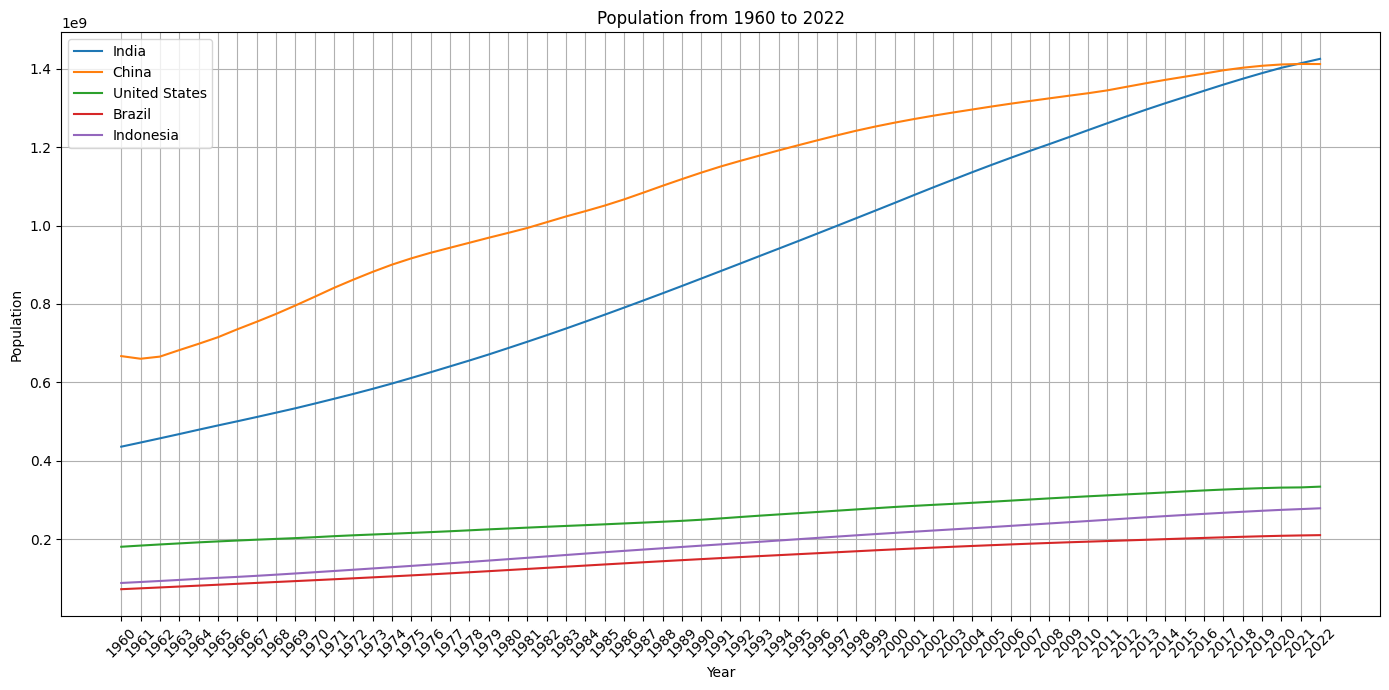

In [6]:
import matplotlib.pyplot as plt

# Filter for selected countries
countries = ['India', 'China', 'United States', 'Brazil', 'Indonesia']
years = [str(y) for y in range(1960, 2023)]  # 1960–2022

plt.figure(figsize=(14, 7))

for country in countries:
    country_data = df[df['Country Name'] == country]
    plt.plot(years, country_data[years].values.flatten(), label=country)

plt.title('Population from 1960 to 2022')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


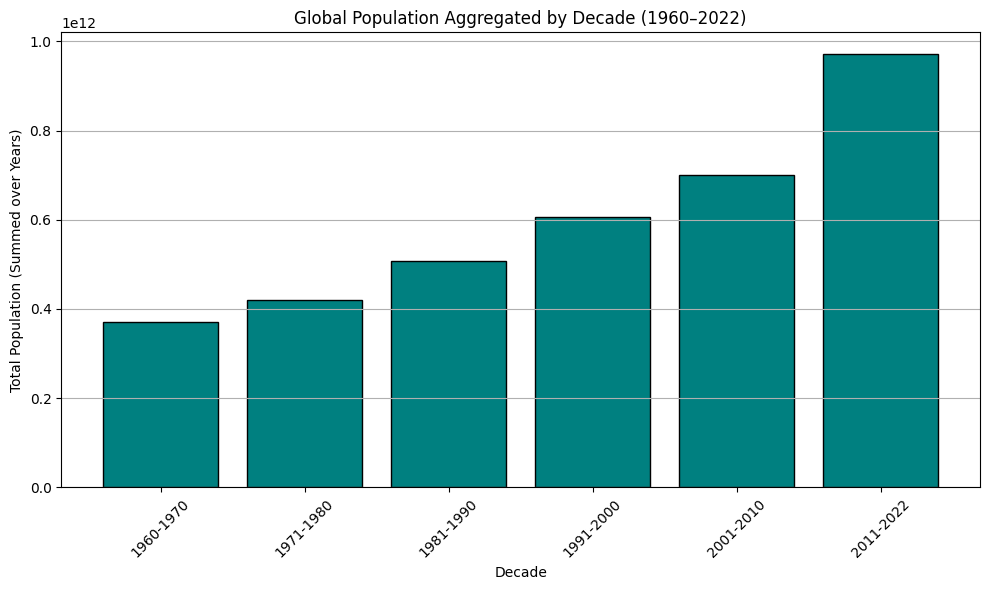

In [8]:
import matplotlib.pyplot as plt

# Define years from 1960 to 2022
years = [str(y) for y in range(1960, 2023)]

# Calculate global population for each year
global_pop = df[years].sum()

# Define custom decade bins
decade_bins = {
    '1960-1970': list(range(1960, 1971)),
    '1971-1980': list(range(1971, 1981)),
    '1981-1990': list(range(1981, 1991)),
    '1991-2000': list(range(1991, 2001)),
    '2001-2010': list(range(2001, 2011)),
    '2011-2022': list(range(2011, 2023)),
}

# Sum populations over each decade
decade_sums = {}
for label, years_range in decade_bins.items():
    str_years = [str(y) for y in years_range]
    decade_sums[label] = global_pop[str_years].sum()

# Plot
plt.figure(figsize=(10,6))
plt.bar(decade_sums.keys(), decade_sums.values(), color='teal', edgecolor='black')
plt.title('Global Population Aggregated by Decade (1960–2022)')
plt.xlabel('Decade')
plt.ylabel('Total Population (Summed over Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
